## Ejercicio 2: Cotrol de diabetes


### 1. Introducción

<div style="text-align:justify; text-indent: 25px">
    En este ejercicio, se buscó entrenar a un modelo que pueda predecir si una persona tiene o no diabetes, en base a ciertos valores clínicos (características) de la persona. Los datos son tomados de un archivo en formato ".csv". El modelo debe estar preparado para predecir lo mejor posible en casos donde haya valores sin definir, cuya representación en el dataset es un valor nulo. Para reconocer estos valores nulos, se analizó previamente el histograma de cada característica. No obstante, para el caso de los 'pregnancies' y de los 'outcome' un valor igual a cero sí es un valor posible. Por ende, el primer paso para el preprocesamiento del dataset fue reeemplazar a los valores incoherentes por 'NaN'. 
</div>

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from scipy.stats import rv_histogram

df = pd.read_csv('diabetes.csv').replace(0, np.nan)
df[['Pregnancies', 'Outcome']] = df[['Pregnancies', 'Outcome']].replace(np.nan, 0)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1.0


### 2. Histograma y análisis de datos

<div style="text-align:justify; text-indent: 25px">
    Una vez que se tiene el dataset sin valores inválidos, se procede a graficar el histograma de cada característica para tener una mayor comprensión de como quedan los datos. Asimismo, los histogramas se dividien según la persona tenga o no diabetes, para que la lectura sea más representativa. Acompañado del histograma, se analiza la media, los cuartiles, valores minimos y máximos, cantidad y desvío estandar de cada característica.
</div>

c:\users\alanv\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


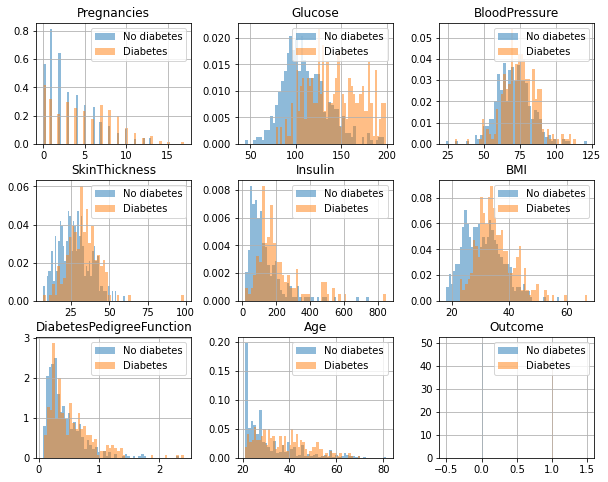

In [27]:
groups = df.groupby('Outcome')#[df.columns[df.columns != 'Outcome']]
axes = groups.get_group(0).hist(figsize = (10, 8), bins = 50, density = True, alpha = .5, label = 'No diabetes');
groups.get_group(1).hist(ax = axes.ravel(), bins = 50, density = True, alpha = .5, label = 'Diabetes');
for ax in axes.ravel(): ax.legend()

In [41]:
groups[['Pregnancies', 'Glucose']].describe()

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0.0           500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   497.0   
1.0           268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   266.0   

                                                                  
               mean        std   min    25%    50%    75%    max  
Outcome                                                           
0.0      110.643863  24.776906  44.0   93.0  107.0  125.0  197.0  
1.0      142.319549  29.599199  78.0  119.0  140.0  167.0  199.0

In [42]:
groups[['BloodPressure', 'SkinThickness']].describe()

BloodPressure                                                       \
                count       mean        std   min   25%   50%   75%    max   
Outcome                                                                      
0.0             481.0  70.877339  12.161223  24.0  62.0  70.0  78.0  122.0   
1.0             252.0  75.321429  12.299866  30.0  68.0  74.5  84.0  114.0   

        SkinThickness                                                     
                count       mean        std  min   25%   50%   75%   max  
Outcome                                                                   
0.0             361.0  27.235457  10.026491  7.0  19.0  27.0  33.0  60.0  
1.0             180.0  33.000000  10.327595  7.0  27.0  32.0  39.0  99.0

In [43]:
groups[['Insulin', 'BMI']].describe()

Insulin                                                             \
          count        mean         std   min    25%    50%     75%    max   
Outcome                                                                      
0.0       264.0  130.287879  102.482237  15.0   66.0  102.5  161.25  744.0   
1.0       130.0  206.846154  132.699898  14.0  127.5  169.5  239.25  846.0   

           BMI                                                       
         count       mean       std   min   25%   50%     75%   max  
Outcome                                                              
0.0      491.0  30.859674  6.560737  18.2  25.6  30.1  35.300  57.3  
1.0      266.0  35.406767  6.614982  22.9  30.9  34.3  38.925  67.1

In [44]:
groups[['DiabetesPedigreeFunction', 'Age']].describe()

DiabetesPedigreeFunction                                             \
                           count      mean       std    min      25%    50%   
Outcome                                                                       
0.0                        500.0  0.429734  0.299085  0.078  0.22975  0.336   
1.0                        268.0  0.550500  0.372354  0.088  0.26250  0.449   

                           Age                                                \
             75%    max  count       mean        std   min   25%   50%   75%   
Outcome                                                                        
0.0      0.56175  2.329  500.0  31.190000  11.667655  21.0  23.0  27.0  37.0   
1.0      0.72800  2.420  268.0  37.067164  10.968254  21.0  28.0  36.0  44.0   

               
          max  
Outcome        
0.0      81.0  
1.0      70.0

In [46]:
df['Outcome'].value_counts(normalize = True)

0.0    0.651042
1.0    0.348958
Name: Outcome, dtype: float64

In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


In [5]:
def gen_dataset(i = 0): return train_test_split(df, test_size = 0.2, shuffle = True, random_state = i)

### 3. Implementación

<div style="text-align:justify; text-indent: 25px">
    A continuación se define la clase "DiabetesClassifier", que se encarga de entrenar al modelo y realizar la predicción. A diferencia del ejercicio anterior, este ejercicio no utiliza hiperparámetros para preprocesar más al dataset.     
</div>

#### 3.1 Entrenamiento

<div style="text-align:justify; text-indent: 25px">
    Para entrenar al modelo, se utilizan los datos previamente separados para tal fin. Dichos datos pueden ser agrupados por grupos, cuyo tamaño puede variar. Además, se puede aplicar cierto valor de smoothing para mejorar el entrenamiento. 
</div>

<div style="text-align:justify; text-indent: 25px">
    Gracias al análisis previo de los histogramas, las características que no aportaban distinción significativa entre diabéticos y no diabéticos fueron excluidas para el entrenamiento. Dichas características son "BloodPressure" y "SkinThickness". Luego, se procedió a reemplazar los "NaN" por valores que puedan ser utilizados para entrenar. En este caso, dado que se está entrenando al modelo y se puede saber si una persona tiene diabetes o no, los "Nan" se reeemplazaron por la media de la característica a la cual representa, y dicha media es sobre los datos de los diabéticos o no diabéticos por separado.
</div>

In [23]:
class DiabetesClassifier:
    def __init__(self, *args, **kwargs):
        self.trained = False
        self.used_cols = np.empty(0)
    
    def fit(self, train_set, n_groups = None, smoothing = 0):
        
        self.prioris = np.zeros(2)

        self.used_cols = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
        self.train_set, grouped = self.replace_nan(train_set)
        
        #self.distributions : list[list[rv_histogram]] = [[], []]
        self.probabilities = [np.zeros((2, n)) for n in n_groups]
        self.lims = [np.zeros((n, 2)) for n in n_groups]
        
        for group in map(int, grouped.groups.keys()):
            g = grouped.get_group(group)[self.used_cols]#.to_numpy()
            for i in range(len(self.used_cols)):
                
                # Lo hacemos así para sacar mass probability en lugar de density (anda mejor)
                vals, lims = np.histogram(g[self.used_cols[i]], bins = n_groups[i])
                self.lims[i][:, group] = lims[:-1]
                vals = vals + smoothing
                self.probabilities[i][group] = vals / np.sum(vals)
        
        self.means = self.train_set.mean()
        self.prioris[1] = train_set['Outcome'].mean()
        self.prioris[0] = 1 - self.prioris[1]
        self.trained = True
        
    def _check_trained(self):
        if not self.trained: raise Exception('Cannot predict without training')

    def _row_predict(self, data : pd.Series) -> int:
        
        self._check_trained()
        data = data.fillna(self.means)
        nodiab, diab = self.prioris
        
        for i, key in enumerate(data.keys()):
            idx_diab = np.argwhere(self.lims[i][:, 1] <= data[key])
            idx_diab = np.max(idx_diab) if len(idx_diab) else 0

            idx_nodiab = np.argwhere(self.lims[i][:, 0] <= data[key])
            idx_nodiab = np.max(idx_nodiab) if len(idx_nodiab) else 0

            diab *= self.probabilities[i][1, idx_diab]
            nodiab *= self.probabilities[i][0, idx_nodiab]
            
            #nodiab *= self.distributions[0][i].pdf(data[key])
            #diab *= self.distributions[1][i].pdf(data[key])

        return int(nodiab < diab)
    
    def replace_nan(self, data):
        grouped = data.groupby('Outcome')
        grouped_means = grouped.mean()
        filled_0 = data[data['Outcome'] == 0].fillna(grouped_means.loc[0])
        filled_1 = data[data['Outcome'] == 1].fillna(grouped_means.loc[1])
        
        res = filled_0.append(filled_1).reset_index(drop = True)
        return res[self.used_cols], res.groupby('Outcome')[self.used_cols]

    def predict(self, test_set : pd.DataFrame) -> pd.Series:
        return test_set[self.used_cols].apply(self._row_predict, axis = 1)
        
    def score(self, test_set : pd.DataFrame) -> pd.Series:
        return self.metrics(test_set)[0]
    
    def metrics(self, test_set : pd.DataFrame) -> np.array:
        pred_ok = self.predict(test_set) == 1
        targets_ok = test_set['Outcome'] == 1
        
        acc = np.mean(targets_ok == pred_ok)
        VP = np.sum(targets_ok & pred_ok)
        VN = np.sum(~targets_ok & ~pred_ok)
        FP = np.sum(~targets_ok & pred_ok)
        FN = np.sum(targets_ok & ~pred_ok)

        sensib = VP / (VP + FN) if VP or FN else 0
        specif = VN / (VN + FP) if VN or FP else 0
        vpredp = VP / (VP + FP) if VP or FP else 0
        vpredn = VN / (VN + FN) if VN or FN else 0

        return np.array([acc, sensib, specif, vpredp, vpredn])

In [24]:
def testing(n_groups, fillna, smoothing, used_cols):
    reps = 1
    metrics = np.zeros((reps, 5))
    
    classifier = DiabetesClassifier()
    for i in range(reps):
        train, test = gen_dataset(i)
        classifier.fit(train, n_groups, smoothing)
        metrics[i] = classifier.metrics(test)
        
        
    return metrics.mean(axis = 0)      

In [51]:
fillna2 = np.array([True])
#n_groups2 = np.array([[3, 8, 8, 10, 10, 13]]) # Máximo accuracy con los reemplazos de NaN correctos y smoothing = 0.
n_groups2 = np.array([[11, 38, 16, 25, 39, 31]]) # Máximos sensibilidad y VPN con los reemplazos de NaN correctos y smoothing = 0.
#n_groups2 = np.random.randint(1, 100, (10000, 6))
#n_groups2 = np.array([[6, 38, 34, 13, 32, 3, 31, 1]])
smoothing2 = np.array([0], dtype = int)

used_cols = df.columns#[list(map(lambda n: n not in ['SkinThickness', 'BloodPressure'], df.columns))]
res2 = np.zeros((fillna2.size, n_groups2.shape[0], smoothing2.size, 5))
repe = 1

for i, f in enumerate(fillna2):
    for j, n in enumerate(n_groups2):
        for k, s in enumerate(smoothing2):
            if not repe % 10: print(f'{repe} of {fillna2.size * n_groups2.shape[0] * smoothing2.size}', end = '... ')
            res2[i, j, k] = testing(n, f, s, used_cols)
            repe += 1
        
#print(np.round(res2 * 100, 2))  
print('\n  Acc  Sens  Spec   VPP   VPN')
for acf, acn, acs in np.argwhere(res2[:, :, :, 0] == np.max(res2[:, :, :, 0])):
    print(np.round(res2[acf, acn, acs] * 100, 2), f'F={fillna2[acf]} | N={n_groups2[acn]} | S={smoothing2[acs]}')

for sf , sn , ss in np.argwhere(res2[:, :, :, 1] == np.max(res2[:, :, :, 1])):
    print(np.round(res2[sf, sn, ss] * 100, 2), f'F={fillna2[sf]} | N={n_groups2[sn]} | S={smoothing2[ss]}')

for vnf, vnn, vns in np.argwhere(res2[:, :, :, 4] == np.max(res2[:, :, :, 4])):
    print(np.round(res2[vnf, vnn, vns] * 100, 2), f'F={fillna2[vnf]} | N={n_groups2[vnn]} | S={smoothing2[vns]}')


  Acc  Sens  Spec   VPP   VPN
[83.12 89.36 80.37 66.67 94.51] F=True | N=[11 38 16 25 39 31] | S=0
[83.12 89.36 80.37 66.67 94.51] F=True | N=[11 38 16 25 39 31] | S=0
[83.12 89.36 80.37 66.67 94.51] F=True | N=[11 38 16 25 39 31] | S=0


- F=True | N=[11 38 16 25 39 31] | S=0 $\rightarrow$ ($\approx$ Acc = 83, Sens = 89.4, VPN = 94.5)
- F=True | N=[ 6 38 34 13 32  3 31  1] | S=0 $\rightarrow$ ($\approx$ Acc = 81.8, Sens = 85, VPN = 92.5)
- F=True | N=[44  9 34 33 47 17] | S=0 $\rightarrow$ ($\approx$ Acc = 83, Sens = 87, VPN = 93.5)
- F=True | N=[3, 8, 8, 10, 10, 13] | S=0 $\rightarrow$ ($\approx$ Acc = 84.4, Sens = 80.9, VPN = 91)

In [49]:
x = DiabetesClassifier()
x.fit(gen_dataset(0)[0], n_groups = n_groups2[0])
x.score(gen_dataset(0)[1])

0.8311688311688312